- https://www.kaggle.com/code/subhajeetdas/netflix-stock-price-prediction/notebook
- https://github.com/shivamswarnkar/Tesla-Stock-Prediction
- https://learn.microsoft.com/en-us/azure/machine-learning/component-reference/multiclass-logistic-regression?view=azureml-api-2
- https://www.kaggle.com/code/neesham/xgboost-v-s-lightgbm
- https://www.kaggle.com/code/lseiyjg/use-news-to-predict-stock-markets
  

In [17]:

# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)

print(X[:10], y.shape)
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

[[ 1.89149379 -0.39847585  1.63856893  0.01647165  1.51892395 -3.52651223
   1.80998823  0.58810926 -0.02542177 -0.52835426]
 [ 1.86913773 -0.56336215  2.03411807  0.38669445 -0.09584042 -2.92724017
   0.73921674 -0.55633    -0.27340013  0.72129251]
 [ 1.95259701 -2.83144572  0.19055535 -0.66388697  0.19159093 -1.8591214
  -0.10150205 -0.60957741 -2.07750191 -1.75469982]
 [-0.67042514 -0.69082031  0.59354753 -0.06270367  2.37357676 -0.52106039
   0.42872513 -0.26851085  0.49226161 -1.34383965]
 [-1.39890137 -0.71522959 -0.6774507   0.39153885 -0.45832391  2.17898372
  -1.88550244 -0.96686613 -0.42588787 -0.20782615]
 [-2.94551044 -0.79851493 -1.92807818 -0.11749422  3.75941261  2.55924496
  -0.71375699  0.87323395  0.26641973 -3.52801155]
 [-0.99746413 -1.35338763 -1.50586396 -1.73258977  3.66110299  0.44739896
   1.27005199  0.76439032  0.10839262 -3.74038228]
 [-0.26028138  0.51739762  1.78389329  2.51998179  1.46572279 -1.50616812
  -0.68426509  0.64095725  0.27620903  0.3131776 ]
 

In [59]:
from vnstock import *
from sklearn.model_selection import train_test_split

df_his = stock_historical_data('TPB', '2022-01-01', '2023-07-28', "1D", 'stock')

train, test = train_test_split(df_his, test_size = 0.2, shuffle=False)
print(train.head(10))
x_train = train.iloc[:, [1,2,3,4,5]].values
y_train = train.iloc[:, 4].values
print(y_train[:5])

         time   open   high    low  close    volume ticker
0  2022-01-04  26870  28000  26740  27680  11034900    TPB
1  2022-01-05  27520  27680  27130  27190   3828100    TPB
2  2022-01-06  26740  27840  26740  27190   5190400    TPB
3  2022-01-07  27090  27450  26550  26550   4150700    TPB
4  2022-01-10  26550  27160  26190  26250   3892800    TPB
5  2022-01-11  26160  26870  25900  26030   4830300    TPB
6  2022-01-12  26030  27840  25900  27840  18620300    TPB
7  2022-01-13  28030  28490  27260  27290  17622800    TPB
8  2022-01-14  27000  27550  26930  27130   5566400    TPB
9  2022-01-17  26930  27320  26030  26030   9068700    TPB
[27680 27190 27190 26550 26250]


In [60]:
# remove first item in y_train for predict next day close price
y_train_t = y_train[1:]
# remove last item in x_train
x_train_t = x_train[:-1]

print(len(y_train_t), len(x_train_t))

311 311


In [61]:
model_lnr = LinearRegression()
model_lnr.fit(x_train_t, y_train_t)

LinearRegression()

In [62]:
x_test = test.iloc[:, [1,2,3,4,5]].values
y_test = test.iloc[:, 4].values

# remove first item in y_train for predict next day close price
x_test_t = x_test[1:]
# remove last item in x_train
y_test_t = y_test[:-1]
print(len(x_test_t), len(y_test_t))


78 78


In [63]:
y_pred = model_lnr.predict(x_test_t)
print(y_pred[:5], y_test_t[:5])
print(pd.DataFrame({'y_pred': y_pred, 'y_test': y_test_t}))

[16540.88555106 16545.34630663 16498.00288158 16591.39036697
 16632.21001676] [16520 16600 16560 16520 16630]
          y_pred  y_test
0   16540.885551   16520
1   16545.346307   16600
2   16498.002882   16560
3   16591.390367   16520
4   16632.210017   16630
..           ...     ...
73  18581.040916   18750
74  18835.058546   18650
75  18754.633534   19000
76  18524.464442   18800
77  18587.836636   18550

[78 rows x 2 columns]


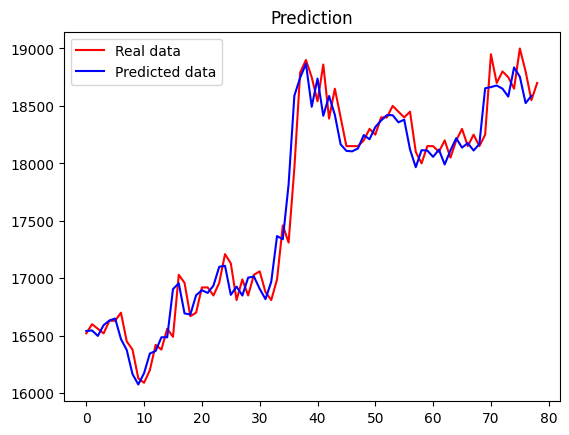

In [64]:
# write code python draw graph y_test and y_pred
import matplotlib.pyplot as plt
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()